<a href="https://colab.research.google.com/github/Inderpaal/Big-Data-and-Machine-Learning-Tools-Techniques/blob/main/P02_Project_115860.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINC612**

**Big Data and Machine Learning Tools & Techniques**

**FINAL PROJECT Semester 2, 2024**

**INDERPAAL SINGH RATHNA BALAJI - 1158660**

________________________________________________________________________________


Question:

To recommend on adding a given asset (“NVDA”) to an existing portfolio

Methods of assessment:
1.	Checking if the asset is different from the existing assets of the portfolio using clustering algorithms:

    a. K-Means clustering

    b. Affinity Propagation
      

2.	Checking the sentiment of the news and articles of asset using NLP and sentiment analysis.

3.	Checking the future value of the asset (next 30 days) using:

    a.	SARIMAX (TIME SERIES ANALYSIS)

    b. LSTM

______________________________________________________________________________

By doing these, we can get to know if

1. The asset is a good addition to the portfolio based on volatility

2. The sentiment of the internet of the asset

3. Checking the future of the asset value(30 days)

#Importing librares and packages

In [ ]:
!pip install yfinance
!pip install sentencepiece
!pip install transformers

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

#Import Model Packages
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

#For NLP
from transformers import PegasusForConditionalGeneration, AutoTokenizer
from bs4 import BeautifulSoup
import requests

#For LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


#Checking if the NVDA is a good fit to the exsisting portfolio using *Clustering algorithms*

## Data Collection and preparation

'PEAK' - is delisted. So removed from the list

In [ ]:
tickers = ['BDX', 'BK', 'BLK', 'BRO', 'C', 'CB', 'CDW', 'CINF', 'CMCSA', 'CME', 'CMG', 'CPT',
'MCD', 'MCHP', 'MGM', 'MMC', 'MO', 'MSI', 'MTD', 'NEM', 'NI', 'NVR', 'ORCL',
'ORLY', 'PEP', 'PFE', 'PGR', 'PNW', 'RF', 'RHI', 'RL', 'SJM', 'SPG', 'STLD',
'STX', 'TECH', 'TEL', 'TER', 'TMUS', 'TRGP',  'UDR', 'UNP', 'VTR', 'WEC', 'WHR',
'WTW', 'XRAY', 'XYL', 'GOOG', 'HBAN', 'HES', 'HII', 'HPQ','NVDA']

In [ ]:
ohlc = yf.download(tickers, start = '2021-10-15', end = '2024-10-15')
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()


[*********************100%***********************]  54 of 54 completed


Ticker,BDX,BK,BLK,BRO,C,CB,CDW,CINF,CMCSA,CME,...,TMUS,TRGP,UDR,UNP,VTR,WEC,WHR,WTW,XRAY,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-08 00:00:00+00:00,237.169998,73.199997,949.070007,105.250000,63.240002,279.959991,223.610001,133.880005,40.950001,221.679993,...,211.169998,158.289993,43.675385,237.559998,62.380001,94.349998,103.519997,292.940002,24.480000,134.199997
2024-10-09 00:00:00+00:00,238.210007,74.019997,955.919983,105.860001,64.120003,282.829987,225.699997,134.690002,41.400002,221.460007,...,212.089996,163.399994,43.715000,237.679993,62.700001,94.309998,104.709999,298.049988,24.520000,136.289993
2024-10-10 00:00:00+00:00,235.539993,74.449997,955.590027,103.669998,63.480000,284.700012,221.690002,135.009995,41.099998,221.250000,...,211.449997,162.520004,43.410000,238.820007,61.570000,93.949997,103.209999,290.239990,24.440001,134.169998
2024-10-11 00:00:00+00:00,236.500000,74.150002,990.260010,104.750000,65.739998,286.829987,222.000000,136.389999,41.259998,221.720001,...,213.039993,165.759995,43.720001,242.309998,62.950001,95.449997,105.110001,290.029999,24.530001,136.860001
2024-10-14 00:00:00+00:00,240.020004,76.510002,991.719971,105.940002,66.010002,288.709991,223.479996,136.880005,41.970001,224.199997,...,215.910004,166.660004,43.939999,245.270004,63.930000,96.300003,104.220001,292.649994,24.430000,137.240005


In [ ]:
prices.describe()

Ticker,BDX,BK,BLK,BRO,C,CB,CDW,CINF,CMCSA,CME,...,TMUS,TRGP,UDR,UNP,VTR,WEC,WHR,WTW,XRAY,XYL
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,241.008544,48.507845,713.570726,70.430271,49.974036,213.284565,194.302340,108.700649,39.606105,191.326376,...,144.867970,81.796425,40.650263,218.212782,46.343204,85.845938,130.721034,231.782383,35.671488,106.944745
std,12.255873,8.716475,98.102413,13.451813,7.975045,30.756131,26.103379,11.392845,4.550364,18.257314,...,22.290825,26.574629,5.749927,19.653994,5.871527,6.011788,28.722221,26.077702,8.052068,18.093860
min,211.674820,34.863983,503.204681,52.467464,36.717640,167.082504,149.107162,84.762642,27.048552,154.006592,...,100.066933,46.008018,30.104681,177.855820,33.422066,74.033775,83.332253,184.114975,23.487381,70.963638
25%,232.769318,41.454815,636.894653,60.549397,43.633354,189.585678,172.268295,99.848869,37.124729,176.139420,...,131.666519,65.314224,36.443668,200.873627,42.322998,80.986794,106.580002,211.639557,29.883209,92.824059
50%,239.088242,45.985023,695.869507,66.624969,47.563522,203.238586,188.383728,107.108078,39.643082,194.778824,...,140.361542,72.501732,38.917473,220.274948,45.566147,85.315529,126.828323,228.321152,34.449318,105.176178
75%,248.480637,54.501442,785.505615,74.629143,57.818913,225.994171,216.284729,115.921455,42.750011,205.849548,...,159.478638,85.863129,43.521236,234.260498,48.683197,90.294174,145.182770,247.632721,38.673363,123.148567
max,278.090240,76.510002,991.719971,105.940002,66.965660,292.119995,256.499237,138.720001,50.266293,225.618912,...,215.910004,166.660004,54.179607,260.918152,64.871582,100.072212,206.438293,300.579987,56.394169,145.183273


##Finding the correlation between the stocks and how the movement of each stock affets the other

<Axes: title={'center': 'Correlation Matrix'}, xlabel='Ticker', ylabel='Ticker'>

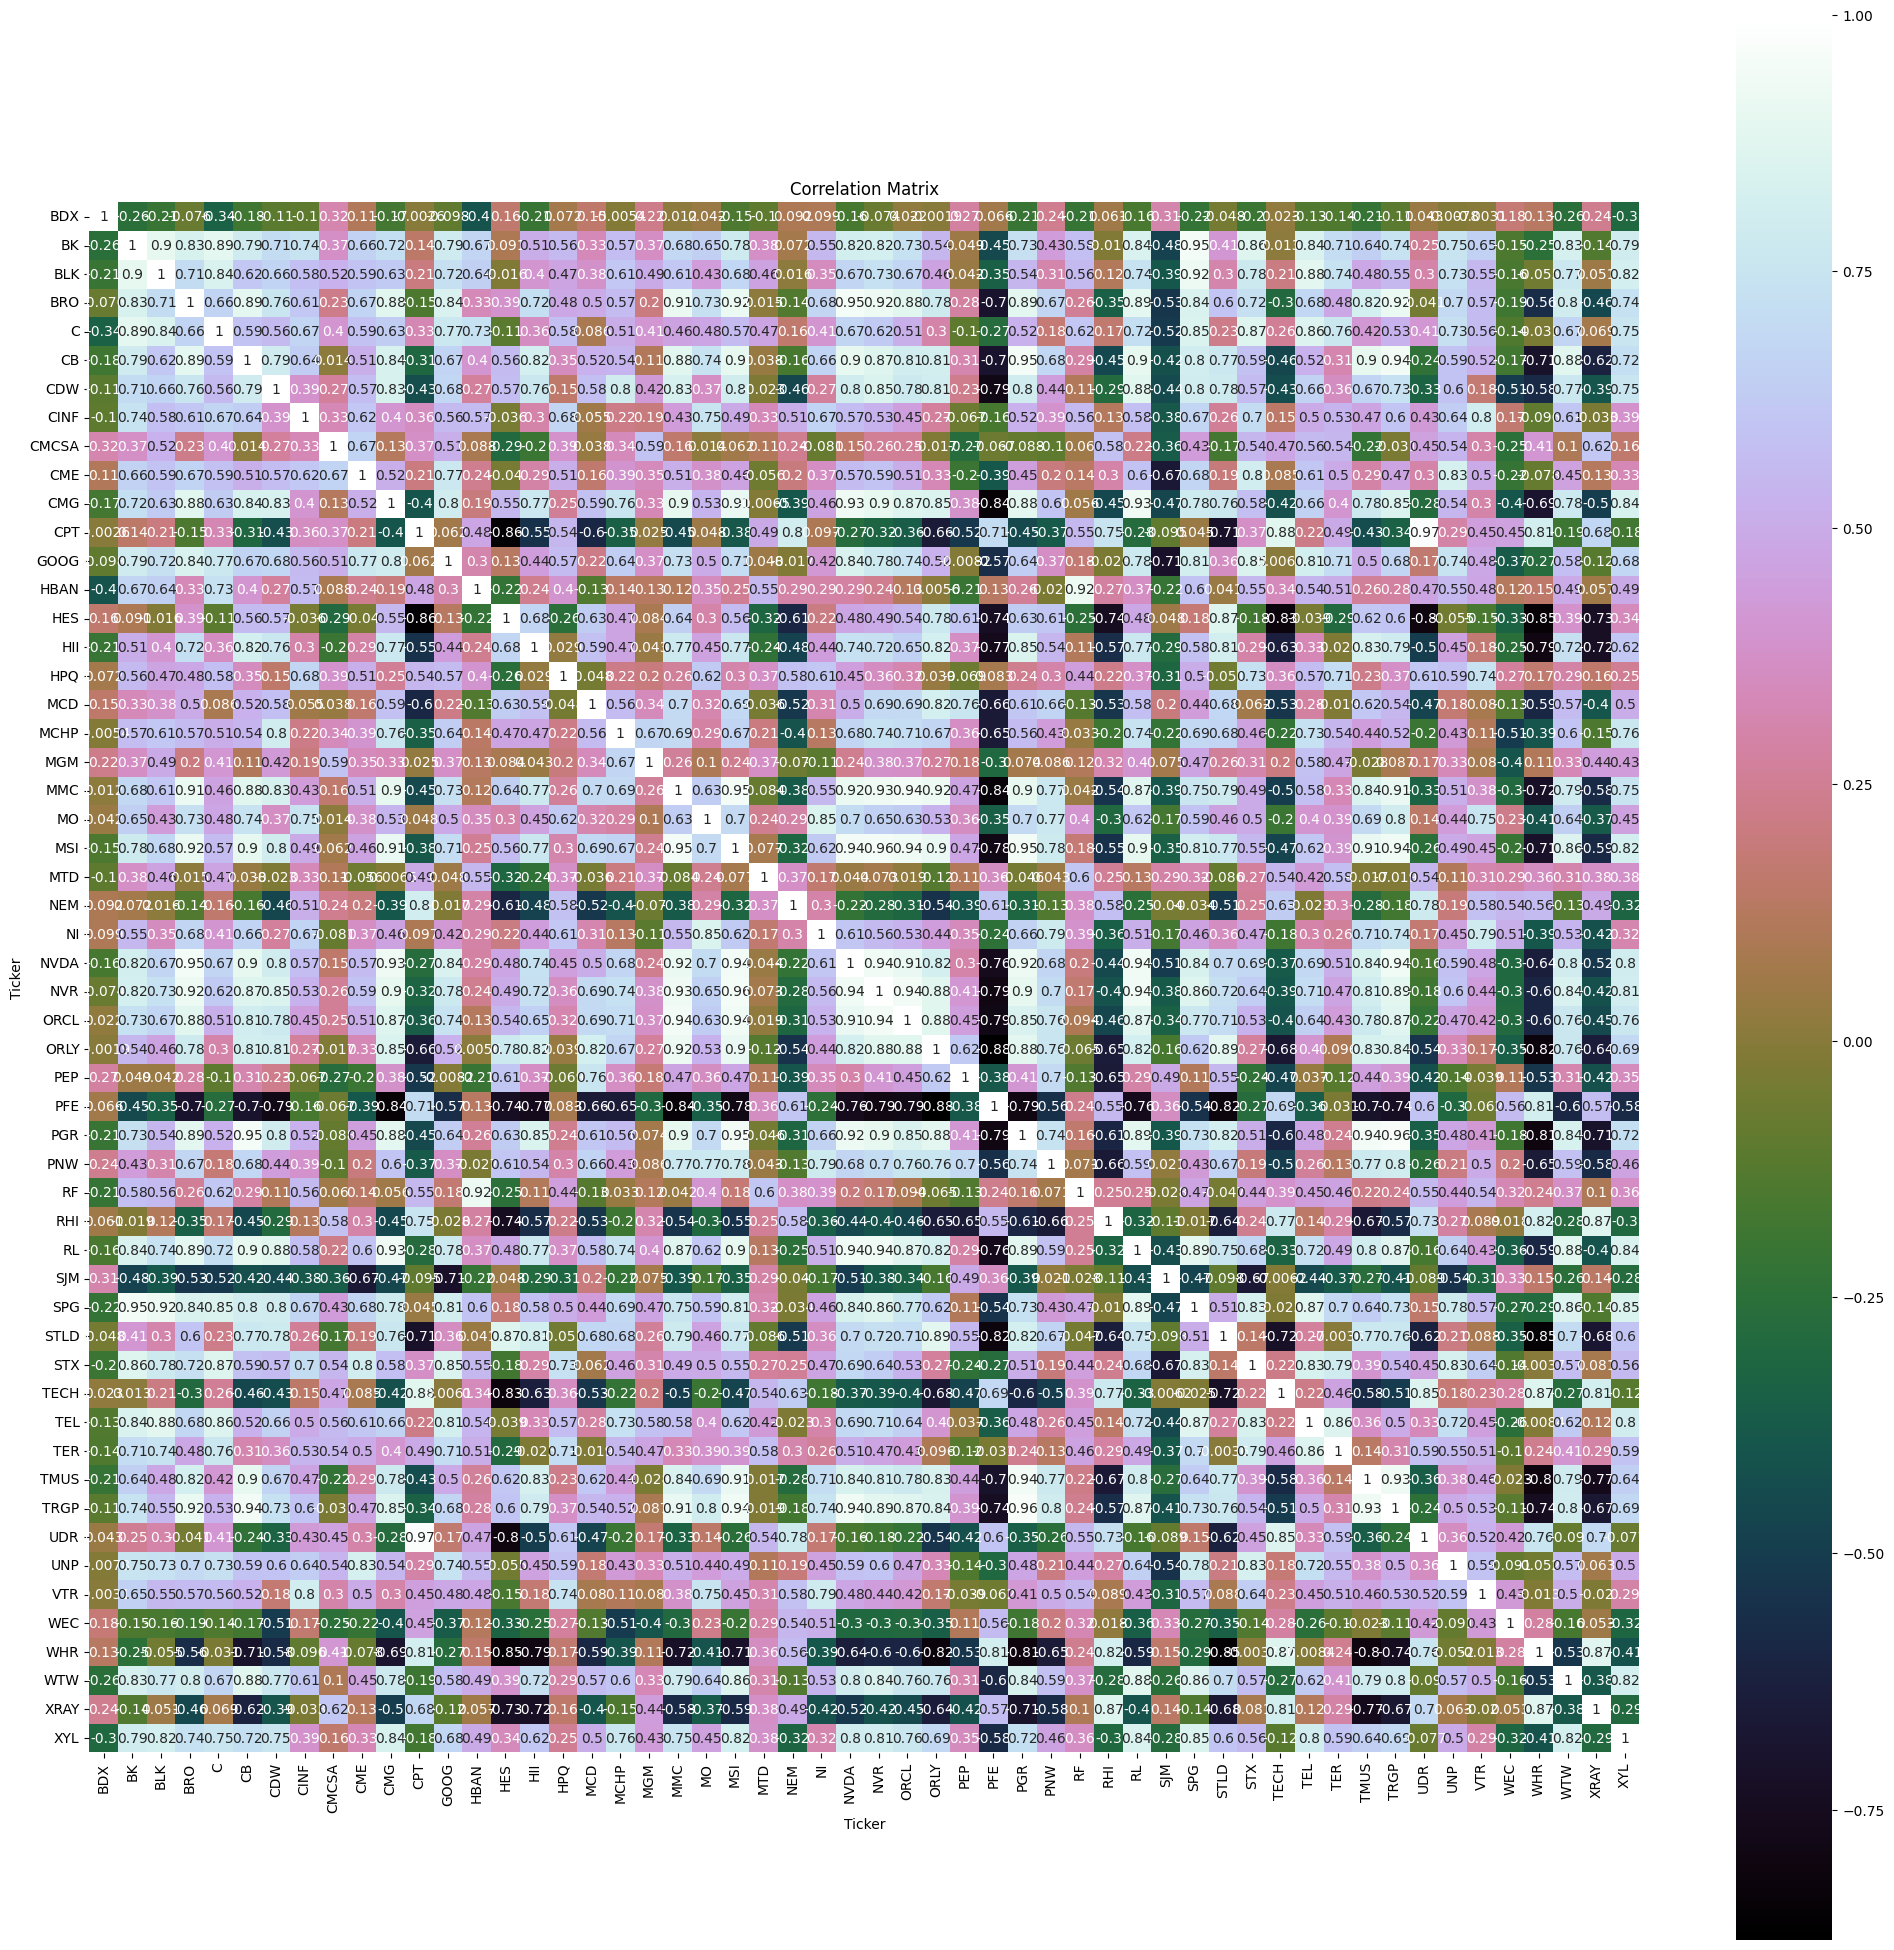

In [ ]:
# correlation
correlation = prices.corr()
plt.figure(figsize=(25,25))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [ ]:
#Checking for any null values and removing the null values'''
print('Null Values =', prices.isnull().values.any())

Null Values = False


##Data Preparation for clustering model

In [ ]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = prices.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices.pct_change().std() * np.sqrt(252)
data=returns

scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
# summarize transformed data
rescaledDataset.head(2)
X=rescaledDataset
X.head(5)

,Returns,Volatility
Ticker,,
BDX,-0.591398,-1.021994
BK,0.201430,-0.405861
BLK,-0.260870,-0.185554
BRO,0.486543,-0.513700
C,-0.555799,-0.044097


## K-Means Clustering


In [ ]:
nclust=7

In [ ]:
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=7)

In [ ]:
#We extract the important parameters from the k-means clustering
centroids, assignments, inertia = k_means.cluster_centers_, k_means.labels_, k_means.inertia_

In [ ]:
#Extracting labels
target_labels = k_means.predict(X)
#Printing the labels
target_labels

array([4, 3, 6, 3, 6, 3, 6, 6, 0, 4, 1, 0, 6, 6, 1, 4, 1, 4, 1, 1, 4, 4,
       3, 6, 1, 4, 2, 3, 1, 3, 4, 0, 5, 4, 1, 0, 1, 4, 6, 1, 1, 0, 6, 1,
       3, 5, 6, 4, 6, 4, 0, 4, 0, 6], dtype=int32)

<a id='5.1.1'></a>
### 5.1.1. Finding optimal number of clusters

Find the flat line and the lower value is the optimal number of clusters

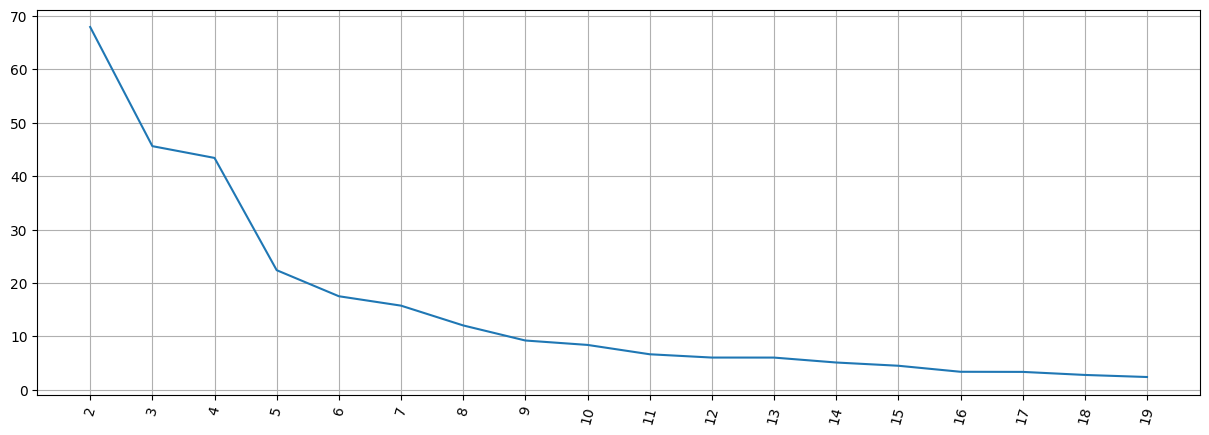

In [ ]:
distorsions = []
max_loop=20
for k in range(2, max_loop):
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(X)
    distorsions.append(kmeans_test.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

#### Silhouette score

According to to the silhouette score, the lowerest point of the first decline is 7. So we take the number of clusters to be 7

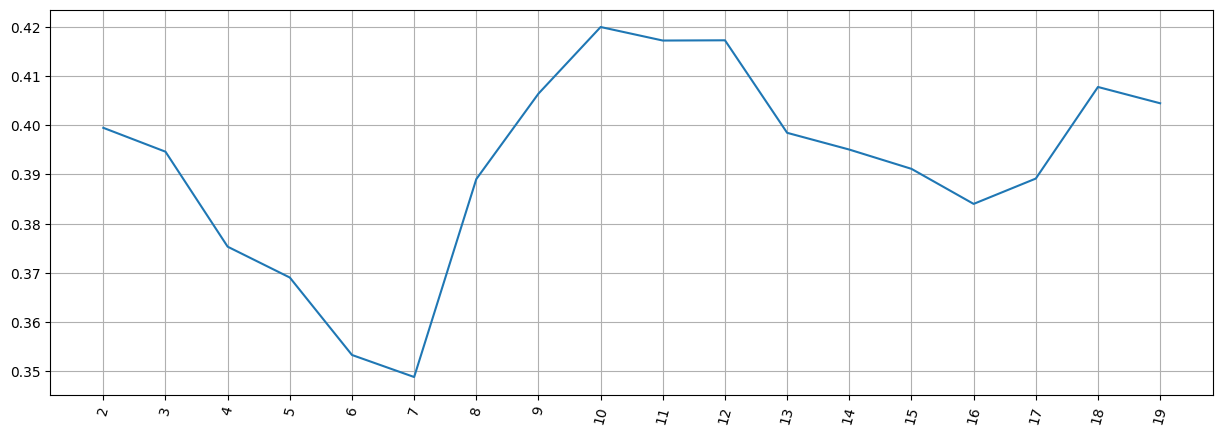

In [ ]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans_test = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans_test.fit(X)
        silhouette_score.append(metrics.silhouette_score(X, kmeans_test.labels_, random_state=10))
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

<a id='5.1.2'></a>
### 5.1.2. Cluster Visualisation

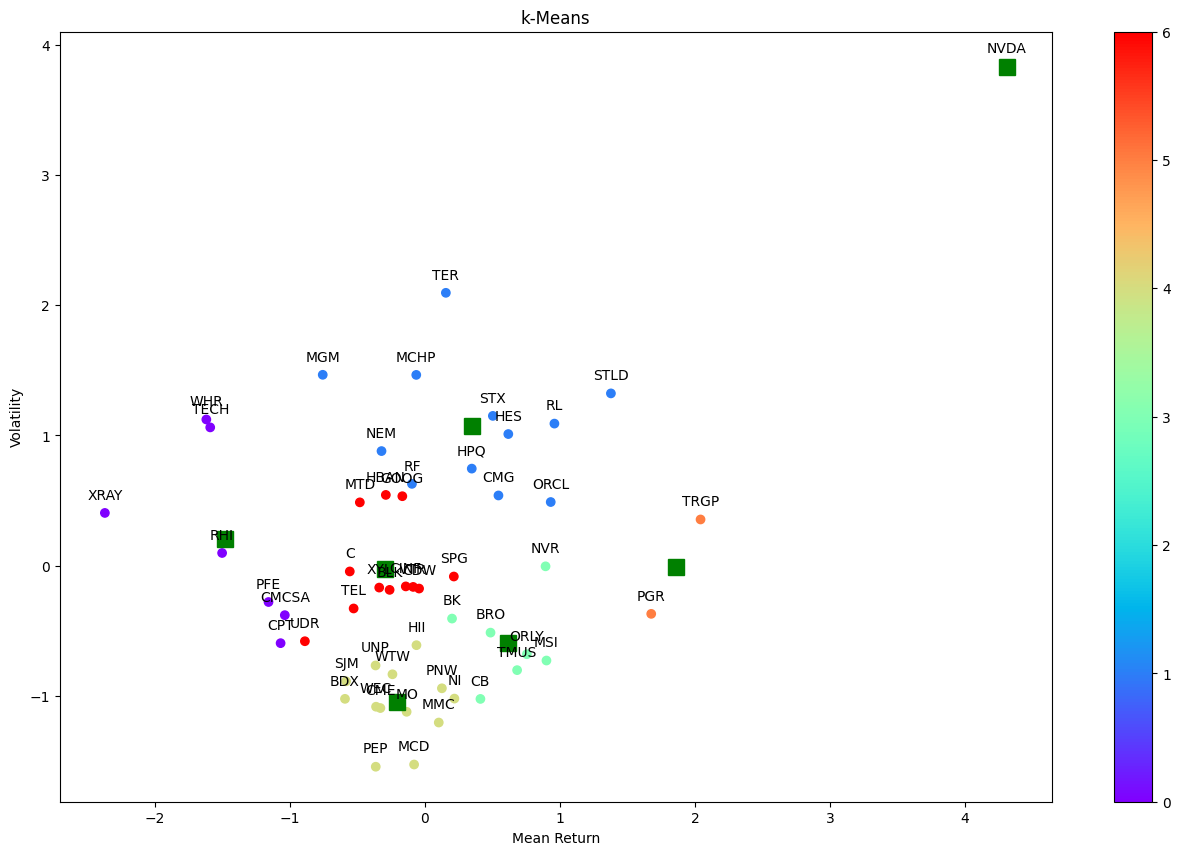

In [ ]:
centroids = k_means.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = k_means.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

# zip joins x and y coordinates in pairs
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

In [ ]:
# @title
cluster_label = pd.concat([pd.DataFrame(X.index), pd.DataFrame(k_means.labels_)],axis = 1)
cluster_label.columns =['Company','Cluster']
cluster_label.sort_values(by=['Cluster'])

,Company,Cluster
31,PFE,0
52,XRAY,0
50,WHR,0
35,RHI,0
8,CMCSA,0
11,CPT,0
41,TECH,0
28,ORCL,1
34,RF,1
24,NEM,1


## Affinity Propagation


In [ ]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

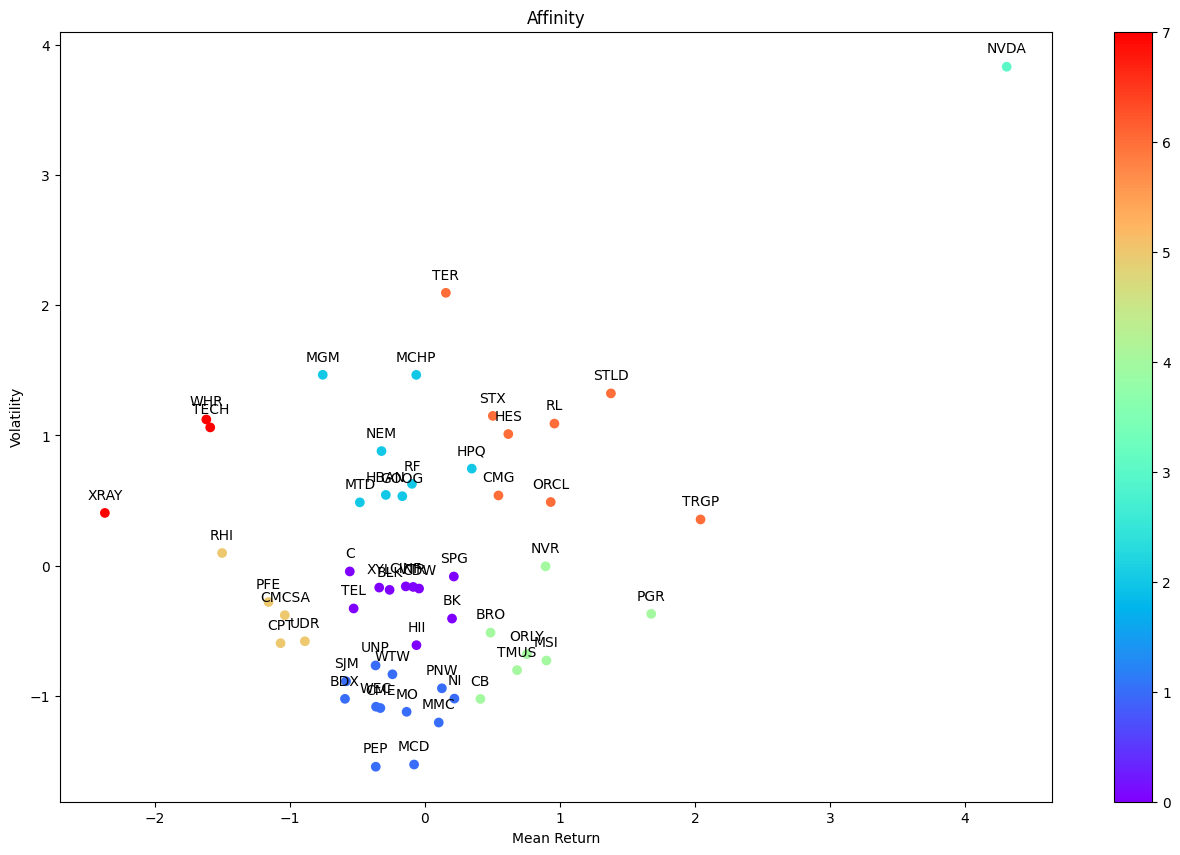

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels2, cmap ="rainbow")
ax.set_title('Affinity')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

# zip joins x and y coordinates in pairs
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [ ]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)

Estimated number of clusters: 8


<Figure size 640x480 with 0 Axes>

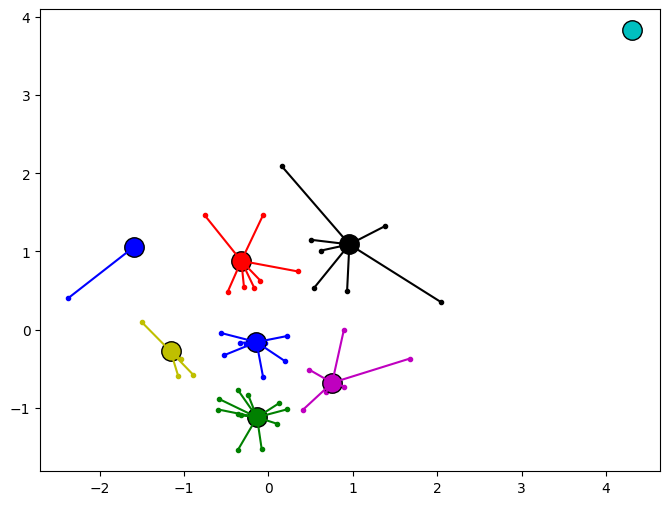

In [ ]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
no_clusters = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

X_temp=np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(8,6))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [ ]:
cluster_label = pd.concat([pd.DataFrame(X.index), pd.DataFrame(ap.labels_)],axis = 1)
cluster_label.columns =['Company','Cluster']
cluster_label.sort_values(by=['Cluster'])

,Company,Cluster
53,XYL,0
1,BK,0
2,BLK,0
4,C,0
15,HII,0
6,CDW,0
7,CINF,0
48,VTR,0
42,TEL,0
38,SPG,0




K Means clustering:

*   The total number of clusters is 7. And thus number of stocks in the same cluster as the stock is 0.
*   Visually, The stock of NVDA is seperated from the rest of the stocks.

Affinity Propogation:

*   The total number of clusters is 8. And thus number of stocks in the same cluster as the stock is 0.
*   Visually, The stock of NVDA is seperated from the rest of the stocks.

SO as you can see, the algorithms are indicating that 'NVDA' is quite different from the exsisting stocks in the portfolio.


_______________________________________________________________________________

# Analysing the news around the web.

In [ ]:
model_name = "human-centered-summarization/financial-summarization-pegasus"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at human-centered-summarization/financial-summarization-pegasus and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
monitored_tickers = ['NVDA']

In [ ]:
def search_for_stock_news_urls(ticker):
    search_url = "https://www.google.com/search?q=yahoo+finance+{}&tbm=nws".format(ticker)
    r = requests.get(search_url)
    soup = BeautifulSoup(r.text, 'html.parser')
    atags = soup.find_all('a')
    hrefs = [link['href'] for link in atags]
    return hrefs

In [ ]:
raw_urls = {ticker:search_for_stock_news_urls(ticker) for ticker in monitored_tickers}
raw_urls

{'NVDA': ['/?sa=X&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQOwgC',
  '/search?q=yahoo+finance+NVDA&sca_esv=53017b0e41c9f5f0&ie=UTF-8&tbm=nws&gbv=1&sei=3lAPZ-bkDNmXwbkPp6rA2QQ',
  '/search?q=yahoo+finance+NVDA&sca_esv=53017b0e41c9f5f0&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQ_AUIBSgA',
  '/search?q=yahoo+finance+NVDA&sca_esv=53017b0e41c9f5f0&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQ_AUIBygC',
  '/search?q=yahoo+finance+NVDA&sca_esv=53017b0e41c9f5f0&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQ_AUICCgD',
  '/url?q=https://maps.google.com/maps%3Fq%3Dyahoo%2Bfinance%2BNVDA%26um%3D1%26ie%3DUTF-8%26ved%3D1t:200713%26ictx%3D111&opi=89978449&sa=U&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQiaAMCAkoBA&usg=AOvVaw1MWohd-CEEk6xbZPHMSg70',
  '/url?q=/search%3Fq%3Dyahoo%2Bfinance%2BNVDA%26sca_esv%3D53017b0e41c9f5f0%26ie%3DUTF-8%26tbm%3Dshop%26source%3Dlnms%26ved%3D1t:200713%26ictx%3D111&opi=89978449&sa=U&ved=0ahUKEwjmy8qdl5KJAxXZSzAB

In [ ]:
raw_urls['NVDA']

['/?sa=X&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQOwgC',
 '/search?q=yahoo+finance+NVDA&sca_esv=53017b0e41c9f5f0&ie=UTF-8&tbm=nws&gbv=1&sei=3lAPZ-bkDNmXwbkPp6rA2QQ',
 '/search?q=yahoo+finance+NVDA&sca_esv=53017b0e41c9f5f0&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQ_AUIBSgA',
 '/search?q=yahoo+finance+NVDA&sca_esv=53017b0e41c9f5f0&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQ_AUIBygC',
 '/search?q=yahoo+finance+NVDA&sca_esv=53017b0e41c9f5f0&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQ_AUICCgD',
 '/url?q=https://maps.google.com/maps%3Fq%3Dyahoo%2Bfinance%2BNVDA%26um%3D1%26ie%3DUTF-8%26ved%3D1t:200713%26ictx%3D111&opi=89978449&sa=U&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQiaAMCAkoBA&usg=AOvVaw1MWohd-CEEk6xbZPHMSg70',
 '/url?q=/search%3Fq%3Dyahoo%2Bfinance%2BNVDA%26sca_esv%3D53017b0e41c9f5f0%26ie%3DUTF-8%26tbm%3Dshop%26source%3Dlnms%26ved%3D1t:200713%26ictx%3D111&opi=89978449&sa=U&ved=0ahUKEwjmy8qdl5KJAxXZSzABHScVMEsQiaAMCAo

In [ ]:
import re

In [ ]:
exclude_list = ['maps', 'policies', 'preferences', 'accounts', 'support']

In [ ]:
def strip_unwanted_urls(urls, exclude_list):
    val = []
    for url in urls:
        if 'https://' in url and not any(exclude_word in url for exclude_word in exclude_list):
            res = re.findall(r'(https?://\S+)', url)[0].split('&')[0]
            val.append(res)
    return list(set(val))

In [ ]:
cleaned_urls = {ticker:strip_unwanted_urls(raw_urls[ticker], exclude_list) for ticker in monitored_tickers}
cleaned_urls

{'NVDA': ['https://finance.yahoo.com/news/jim-cramer-nvidia-nvda-never-212059900.html',
  'https://finance.yahoo.com/video/nvidia-hit-another-record-high-142841557.html',
  'https://finance.yahoo.com/news/live/stock-market-today-stocks-retreat-from-records-as-nvidia-asml-lead-chipmakers-lower-103834849.html',
  'https://finance.yahoo.com/video/asml-trims-outlook-sends-ai-205432080.html',
  'https://finance.yahoo.com/news/nvidia-stock-tumbles-from-record-high-on-news-of-possible-us-chip-export-cap-asmls-dismal-earnings-163259227.html',
  'https://finance.yahoo.com/news/nvidia-vs-palantir-better-red-210015429.html',
  'https://finance.yahoo.com/news/why-nvidia-nvda-shares-sliding-181914089.html',
  'https://finance.yahoo.com/news/live/stock-market-today-nasdaq-leads-stock-declines-as-nvidia-chip-stocks-sell-off-200140020.html',
  'https://finance.yahoo.com/news/asian-stocks-poised-track-us-222613970.html',
  'https://finance.yahoo.com/news/nvidia-notches-record-high-looks-to-unseat-apple

In [ ]:
def scrape_and_process(URLs):
    ARTICLES = []
    for url in URLs:
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        paragraphs = soup.find_all('p')
        text = [paragraph.text for paragraph in paragraphs]
        words = ' '.join(text).split(' ')[:350]
        ARTICLE = ' '.join(words)
        ARTICLES.append(ARTICLE)
    return ARTICLES

In [ ]:
articles = {ticker:scrape_and_process(cleaned_urls[ticker]) for ticker in monitored_tickers}
articles

{'NVDA': ['We recently published a list of\xa0Jim Cramer Latest Portfolio Update: Top 10 Stocks.\xa0Since NVIDIA Corp (NASDAQ:NVDA) ranks 2nd on the list, it deserves a deeper look. Jim Cramer during his October 14 program on CNBC looked excited as he celebrated the rebound of major tech stocks, saying these companies are showing their “staying power” despite the odds. “We’re back. That’s right. Whatever you want to call them, these big tech plays are demonstrating their staying power no matter what happens.” Cramer said that the latest earnings season would be critical for the overall market and investor portfolios. He also pointed out the broadening of the rally, saying other groups besides the tech industry are also rebounding. “This rally is not a zero-sum equation where the rest of the market does nothing. Other groups can work, too, in this market. There’s a lot of money going around, and we know there’s a lot of money coming into the market. The Fed is cutting rates, and friendl

In [ ]:
def summarize(articles):
    summaries = []
    for article in articles:
        input_ids = tokenizer.encode(article, return_tensors='pt', max_length=55, truncation=True)
        output = model.generate(input_ids, max_length=55, num_beams=5, early_stopping=True)
        summary = tokenizer.decode(output[0], skip_special_tokens=True)
        summaries.append(summary)
    return summaries

In [ ]:
summaries = {ticker:summarize(articles[ticker]) for ticker in monitored_tickers}
summaries

{'NVDA': ['NVDA is the 2nd best-performing stock in the S&P 500 this year.',
  'We are aware of the issue and are working to resolve it.',
  'Shares of the leading semiconductor supplier sank around 15%.',
  'We are aware of the issue and are working to resolve it.',
  'Shares of the chipmaker fell after report of possible U.S. cap.',
  'Nvidia’s year-to-date gain makes it second-most valuable company in the world.',
  'ASML posts weaker-than-expected earnings. Nvidia shares fall 6.8% in pre-market after earnings',
  'Shares of ASML sank more than 15% after earnings.',
  'Intel’s outlook disappoints on chip sales restrictions. Tech stocks have powered the bull market this year',
  'Shares rose 2.4% Monday, putting them in contention for top spot.',
  'Your information may be shared with third parties.']}

In [ ]:
from transformers import pipeline
sentiment = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sentiment(summaries['NVDA'])

[{'label': 'POSITIVE', 'score': 0.9985513091087341},
 {'label': 'POSITIVE', 'score': 0.9979088306427002},
 {'label': 'NEGATIVE', 'score': 0.9996912479400635},
 {'label': 'POSITIVE', 'score': 0.9979088306427002},
 {'label': 'NEGATIVE', 'score': 0.9996896982192993},
 {'label': 'POSITIVE', 'score': 0.9997969269752502},
 {'label': 'NEGATIVE', 'score': 0.9996045231819153},
 {'label': 'NEGATIVE', 'score': 0.9997490048408508},
 {'label': 'NEGATIVE', 'score': 0.9711780548095703},
 {'label': 'POSITIVE', 'score': 0.9970614314079285},
 {'label': 'NEGATIVE', 'score': 0.9903545379638672}]

In [ ]:
scores = {ticker:sentiment(summaries[ticker]) for ticker in monitored_tickers}
scores

{'NVDA': [{'label': 'POSITIVE', 'score': 0.9985513091087341},
  {'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'NEGATIVE', 'score': 0.9996912479400635},
  {'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'NEGATIVE', 'score': 0.9996896982192993},
  {'label': 'POSITIVE', 'score': 0.9997969269752502},
  {'label': 'NEGATIVE', 'score': 0.9996045231819153},
  {'label': 'NEGATIVE', 'score': 0.9997490048408508},
  {'label': 'NEGATIVE', 'score': 0.9711780548095703},
  {'label': 'POSITIVE', 'score': 0.9970614314079285},
  {'label': 'NEGATIVE', 'score': 0.9903545379638672}]}

As you can see, The scores of of the textual analysis indicate that the sentiments of the articles regarding 'NVDA' on yahoo finance is mostly positive. Meaning that the market sentiment is POSITIVE.

________________________________________________________________________________

#Forecasting to see the furure values using SARIMAX and LSTM

In [ ]:
tikers = ["NVDA"]

In [ ]:
fc = yf.download(tikers, start="2020-01-01", end ="2024-01-01")


[*********************100%***********************]  1 of 1 completed


In [ ]:
fc.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.96875,5.99775,5.91800,5.99775,5.973123,237536000
2020-01-03,5.87750,5.94575,5.85250,5.90175,5.877516,205384000
2020-01-06,5.80800,5.93175,5.78175,5.92650,5.902164,262636000
2020-01-07,5.95500,6.04425,5.90975,5.99825,5.973621,314856000
2020-01-08,5.99400,6.05100,5.95375,6.00950,5.984825,277108000


In [ ]:
# Get adj close
fc = fc['Adj Close']

In [ ]:
fc.head(5)

,Adj Close
Date,
2020-01-02,5.973123
2020-01-03,5.877516
2020-01-06,5.902164
2020-01-07,5.973621
2020-01-08,5.984825


In [ ]:
data_length = len(fc)
data_length

1006

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Augmented Dickey-Fuller test
result = adfuller(fc)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.09673017238063088
p-value: 0.9658371374159964
Critical Values: {'1%': -3.4368734638130847, '5%': -2.8644201518188126, '10%': -2.5683035273879358}


### We get P>0.05 hence our data is not stationary, so we will use differencing to make the data stationary.

In the below code we Use first order differencing to check whether the data is stationary or not.

In [ ]:

result = adfuller(fc)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


if result[1] > 0.05:  # If p-value is greater than 0.05, the series is likely non-stationary
    # Apply differencing (you might need to experiment with the order)
    fc_diff = fc.diff().dropna()  # First-order differencing

    # Perform ADF test on the differenced series
    result_diff = adfuller(fc_diff)
    print('Differenced ADF Statistic:', result_diff[0])
    print('Differenced p-value:', result_diff[1])

    # If still not stationary, you can try higher-order differencing
    # fc_diff = fc.diff().diff().dropna()  # Second-order differencing

else:
    print("The original time series is already stationary.")

ADF Statistic: 0.09673017238063088
p-value: 0.9658371374159964
Critical Values: {'1%': -3.4368734638130847, '5%': -2.8644201518188126, '10%': -2.5683035273879358}
Differenced ADF Statistic: -32.10215122695412
Differenced p-value: 0.0


After applying the Differencing we get a P Value which is Smaller than 0.05 hence now our data is Stationary.

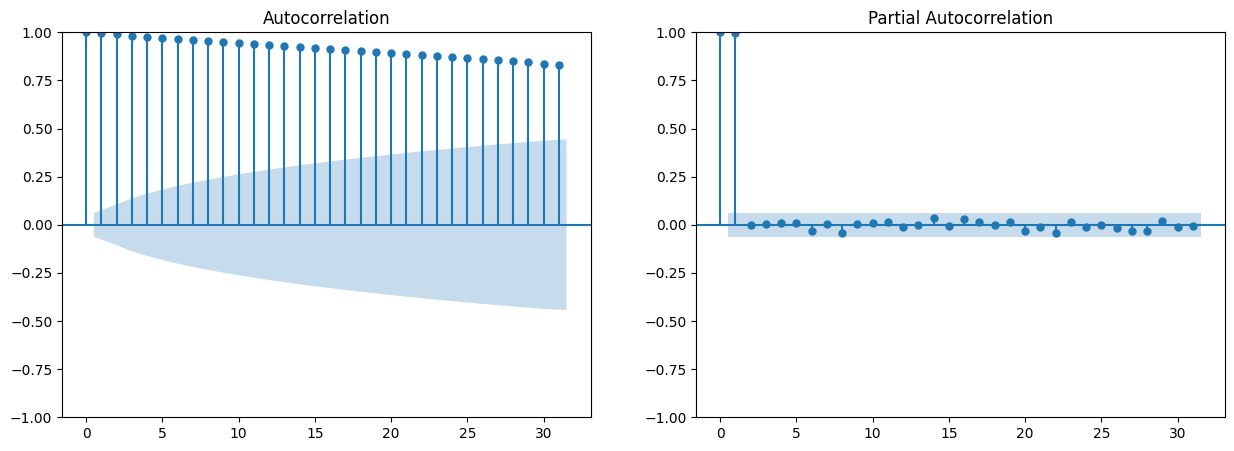

In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(fc, ax=axes[0])
plot_pacf(fc, ax=axes[1])

plt.show()

This shows that the lag is 8.

###Seasonality

This shows that the lag is 8.

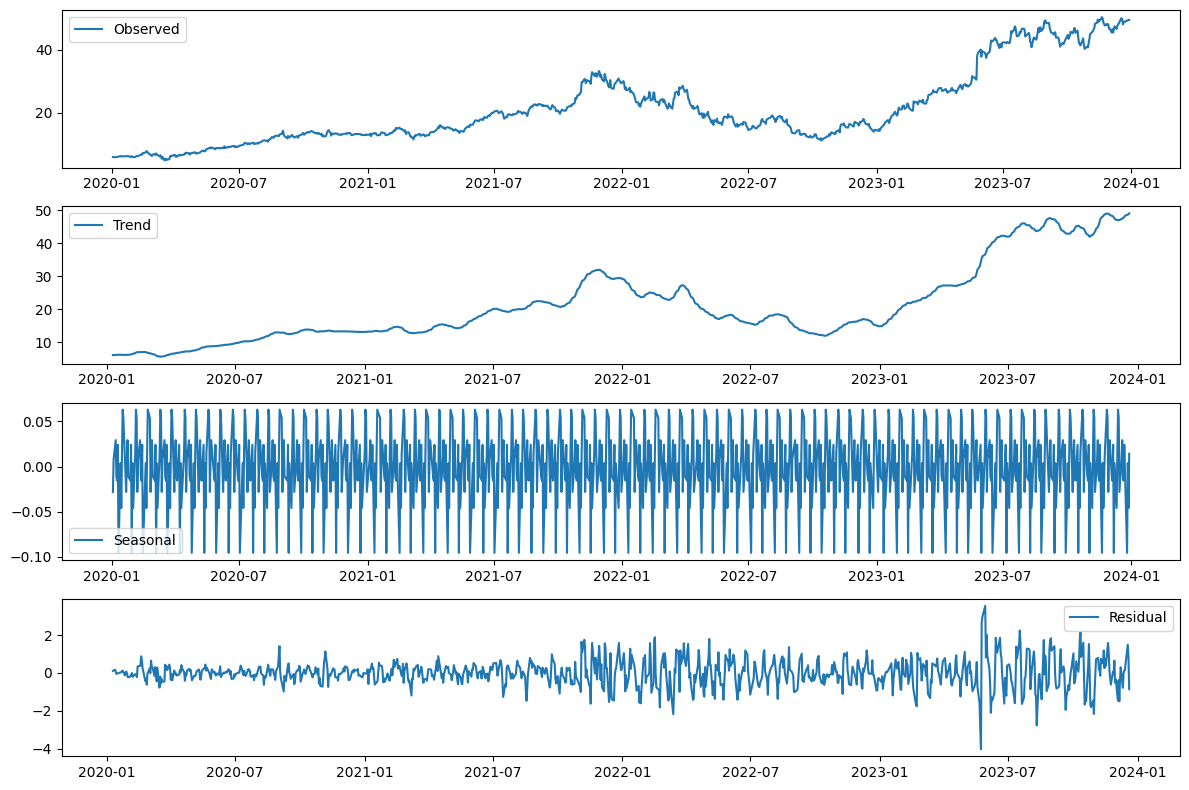

In [ ]:
decomposition = seasonal_decompose(fc, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Using SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Download data from Yahoo Finance
df = yf.download(["NVDA","^GSPC"], start = '2021-10-15', end = '2024-10-15')
# Extract adj closing prices
df = df['Adj Close']
df['sp500_Lag_1'] = df['^GSPC'].shift(1)
df['sp500_Lag_2'] = df['^GSPC'].shift(2)
df['sp500_Lag_3'] = df['^GSPC'].shift(3)

df = df[["sp500_Lag_1","sp500_Lag_2","sp500_Lag_3","NVDA","^GSPC"]]
df = df.dropna()


# Check for missing and infinite values
print(df.isnull().sum())
print(np.isinf(df).sum())

# Fill missing values with 0
df.fillna(0, inplace=True)

# Create the SARIMAX model
model = SARIMAX(endog=df['NVDA'], exog=df[['sp500_Lag_1','sp500_Lag_2','sp500_Lag_3']], order=(8, 1, 7), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())



[*********************100%***********************]  2 of 2 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Ticker
sp500_Lag_1    0
sp500_Lag_2    0
sp500_Lag_3    0
NVDA           0
^GSPC          0
dtype: int64
Ticker
sp500_Lag_1    0
sp500_Lag_2    0
sp500_Lag_3    0
NVDA           0
^GSPC          0
dtype: int64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                 NVDA   No. Observations:                  750
Model:             SARIMAX(8, 1, 7)x(1, 1, [1], 12)   Log Likelihood               -1573.508
Date:                              Wed, 16 Oct 2024   AIC                           3189.016
Time:                                      05:38:21   BIC                           3285.671
Sample:                                           0   HQIC                          3226.290
                                              - 750                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
sp500_Lag_1     0.0011      0.002      0.478      0.633      -0.003       0.006
sp500_Lag_2    -

Mean Squared Error (MSE): 4.6606
Root Mean Squared Error (RMSE): 2.1588
Mean Absolute Error (MAE): 1.2893
R-squared (R2): 0.9962


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


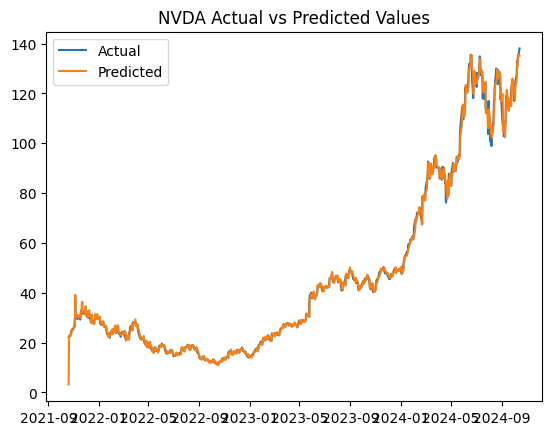

In [ ]:
# Get predictions
predictions = model_fit.get_prediction()
predicted_mean = predictions.predicted_mean

# Evaluate the model
mse = mean_squared_error(df['NVDA'], predicted_mean)
rmse = mean_squared_error(df['NVDA'], predicted_mean, squared=False)
mae = mean_absolute_error(df['NVDA'], predicted_mean)
r2 = r2_score(df['NVDA'], predicted_mean)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Plot the actual and predicted values
plt.plot(df['NVDA'], label='Actual')
plt.plot(predicted_mean, label='Predicted')
plt.legend()
plt.title('NVDA Actual vs Predicted Values')
plt.show()

In [ ]:
# Predict next 30 days with SP500 data as exogenous variable (lagged by 3)
last_exog_values = df[['sp500_Lag_1', 'sp500_Lag_2', 'sp500_Lag_3']].iloc[-1].values.reshape(1, -1)  # Get last values and reshape
forecast_exog = pd.DataFrame(np.repeat(last_exog_values, 30, axis=0), columns=['sp500_Lag_1', 'sp500_Lag_2', 'sp500_Lag_3'],
                             index=pd.date_range(start=df["NVDA"].index[-1] + pd.Timedelta(days=1), periods=30))


forecast = model_fit.get_forecast(steps=30, exog=forecast_exog)

forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a new dataframe to store the predictions
forecast_dates = pd.date_range(start=df["NVDA"].index[-1] + pd.Timedelta(days=1), periods=30)
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_dates)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


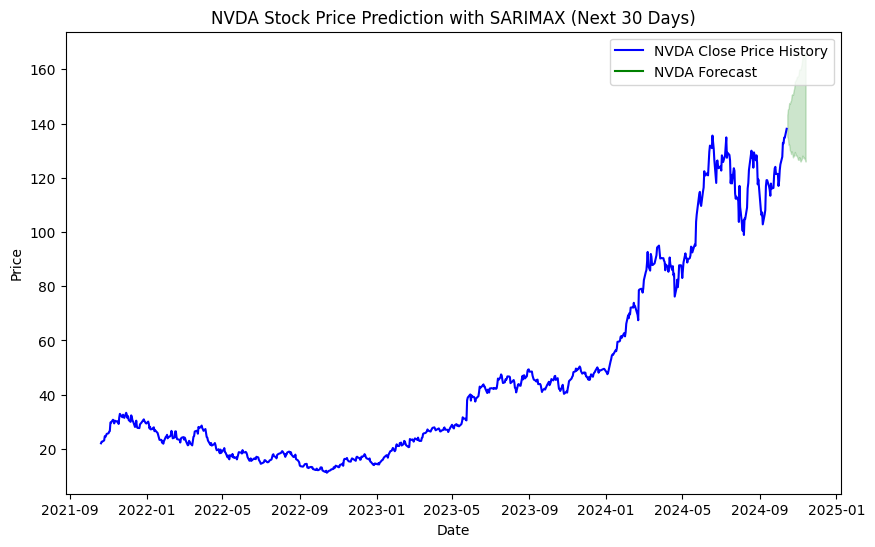

In [ ]:
# Plot historical NVDA prices along with forecasted values
plt.figure(figsize=(10,6))
plt.plot(df["NVDA"], label='NVDA Close Price History', color='blue')
plt.plot(forecast_df['Forecast'], label='NVDA Forecast', color='green')

# Adding confidence intervals
plt.fill_between(forecast_dates,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='green', alpha=0.2)

plt.title('NVDA Stock Price Prediction with SARIMAX (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

________________________________________________________________________________

LSTM

In [ ]:
df['NVDA_lag1'] = df['NVDA'].shift(1)
df['NVDA_lag2'] = df['NVDA'].shift(2)
df['NVDA_lag3'] = df['NVDA'].shift(3)

df = df[["NVDA_lag1","NVDA_lag2","NVDA_lag3","sp500_Lag_1","sp500_Lag_2","sp500_Lag_3","NVDA","^GSPC"]]
df = df.dropna()



# Define features (S&P 500 lags) and target (NVDA price)
X = df[["sp500_Lag_1","sp500_Lag_2","sp500_Lag_3"]]
y = df['NVDA']

# Scaling the df
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshaping for LSTM [samples, time steps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split (80% training, 20% testing)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 3)))
model.add(Dropout(0.2))# to reduce overfitting
model.add(LSTM(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
#model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 1, 50)               │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 25)                  │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,280 (215.94 KB)

 Trainable params: 18,426 (71.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,854 (143.96 KB)

In [ ]:
# prompt: evaluate the model with mae, mse, rmse, r squared
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# y_pred contains the model's predictions on the test set
y_pred = model.predict(X_test)

# Take the first prediction from y_pred to match the shape of y_test
y_pred = y_pred[:, 0] # Select only the first prediction for each sample
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Mean Absolute Error (MAE): 0.1175470190707091
Mean Squared Error (MSE): 0.018484905293084716
Root Mean Squared Error (RMSE): 0.1359592045176961
R-squared (R2): -0.07409995629762212


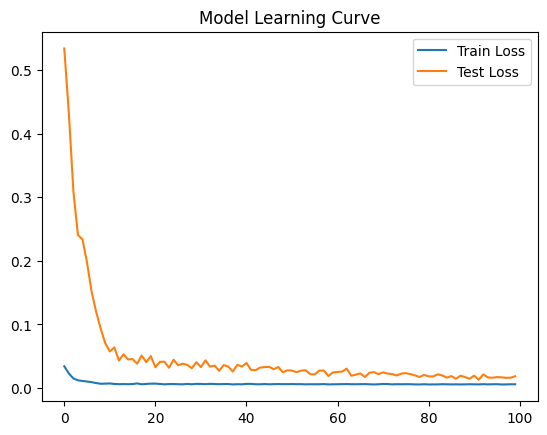

In [ ]:
# Plot learning curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Learning Curve')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest predic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest predic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest predic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest predic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest predic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest predic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest predic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction
<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest predic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


<ipython-input-125-9b3cb7be44ed>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction


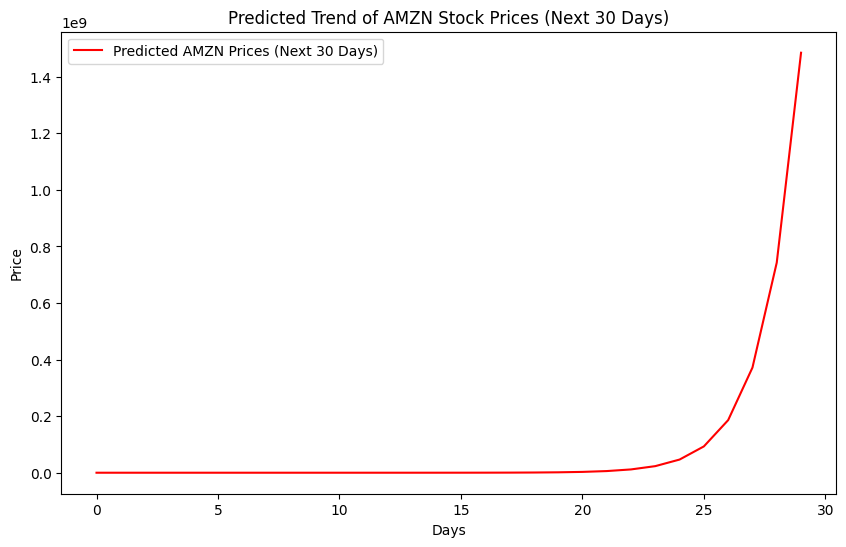

In [ ]:
def predict_next_30_days(model, last_10_days_sp500, scaler_y):
    predictions = []
    # Use the last 10 days as the starting point for the predictions
    input_seq = last_10_days_sp500.reshape((1, 1, last_10_days_sp500.shape[0]))

    for _ in range(30):
        # Predict the next day
        predicted_price = model.predict(input_seq)

        # Reshape the prediction to its original scale
        predicted_price_rescaled = scaler_y.inverse_transform(predicted_price)
        predictions.append(predicted_price_rescaled[0, 0])

        # Prepare the input sequence for the next prediction
        input_seq = np.roll(input_seq, -1, axis=2)
        input_seq[0, 0, -1] = predicted_price  # Update with the latest prediction

    # Return predictions as an array for easy plotting
    return np.array(predictions)

# Get the last 10 days of the S&P 500 data from the test set
last_10_days_sp500_scaled = X_scaled[-1, 0, :]  # Last row of X_test, last 10 days

# Predict the next 30 days for the stock using the last S&P 500 values
predicted_30_days = predict_next_30_days(model, last_10_days_sp500_scaled, scaler_y)

# Plot the predicted trend
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 30), predicted_30_days, label='Predicted AMZN Prices (Next 30 Days)', color='red')
plt.title('Predicted Trend of AMZN Stock Prices (Next 30 Days)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


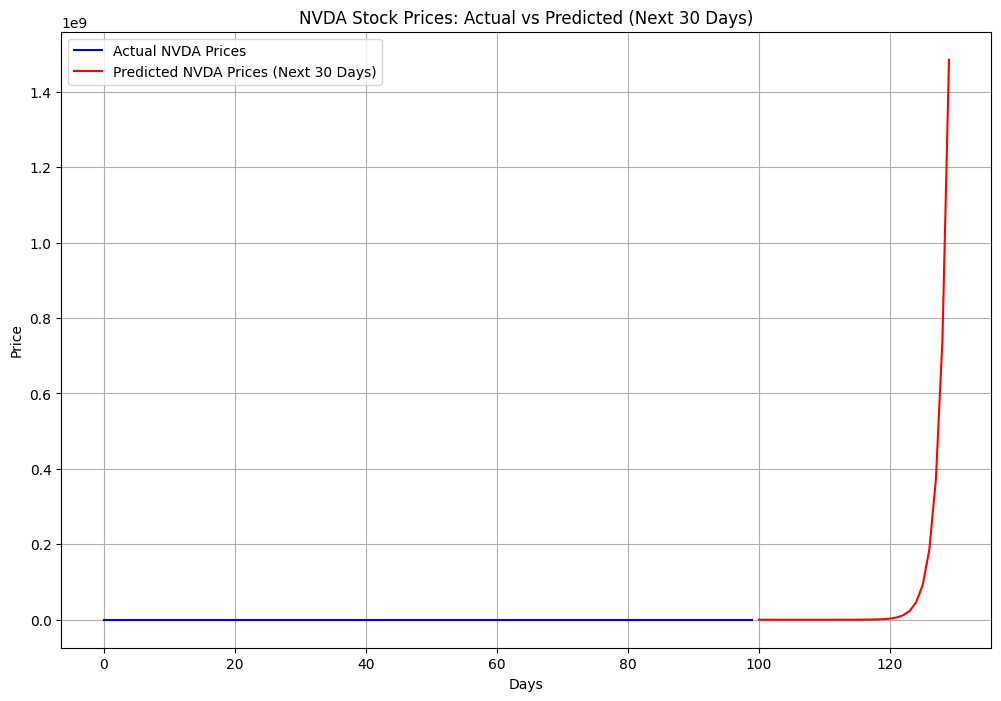

In [ ]:
# Rescale y_test to original scale for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Plot the actual prices (the last 100 days) and the predicted next 30 days
plt.figure(figsize=(12, 8))
plt.plot(np.arange(0, len(y_test_rescaled[-100:])), y_test_rescaled[-100:], label='Actual NVDA Prices', color='blue')
plt.plot(np.arange(len(y_test_rescaled[-100:]), len(y_test_rescaled[-100:]) + 30), predicted_30_days.flatten(), label='Predicted NVDA Prices (Next 30 Days)', color='red')
plt.title('NVDA Stock Prices: Actual vs Predicted (Next 30 Days)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

LSTM model is not being able to forecast even after changing layers, neurons. SO for forecasting the price of NVDA stock we use TIMESERIES analtsis using SARIMAX

________________________________________________________________________________
As it is evident fromthe clustering algorithms, sentiment analysis, forecasting algorithms,

It is **recommended** to add the stock to the portfolio for the following reasons:
1.	From Method (1), the stock will be a good addition to the portfolio as it will diversify the portfolio and thus make it more stable.
2.	From Method (2), the current and historical market sentiment for the stock has been mostly positive, meaning that the stock is being well received by the public and has a good opinion.
3.	From method (3), the future forecast of the stock is promising as it seems to be stable  and growing for the next 30days (1month).
